In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import fuzzywuzzy
import matplotlib.pyplot as plt
from scipy import stats
import janitor as jn
import pandas_profiling
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\clean_prem_players.csv')

In [3]:
df.club.unique()

array(['Manchester City', 'Liverpool', 'Tottenham Hotspur', 'Chelsea',
       'Manchester United', 'Arsenal', 'Everton', 'Leicester City',
       'Bournemouth', 'Wolverhampton Wanderers', 'Newcastle United',
       'Southampton', 'Crystal Palace', 'Watford',
       'Brighton & Hove Albion', 'Burnley', 'Aston Villa', 'Norwich City',
       'Sheffield United', 'West Ham United'], dtype=object)

In [4]:
prem_league_teams = ['Arsenal',
'AFC Bournemouth',
'Brighton & Hove Albion',
'Burnley',
'Cardiff City',
'Chelsea',
'Crystal Palace',
'Everton',
'Fulham',
'Huddersfield Town',
'Leicester City',
'Liverpool',
'Manchester City',
'Manchester United',
'Newcastle United',
'Southampton',
'Tottenham Hotspur',
'Watford',
'West Ham United',
'Wolverhampton Wanderers']

In [5]:
df.head()

,Unnamed: 0,age,assists,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,club,contract_valid_until,date,defending,defending_marking,defending_sliding_tackle,defending_standing_tackle,dribbling,fifa_name,fpl_match_name,fpl_name,games,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,gk_speed,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goals,height,international_reputation,joined_x,joined_y,left,match_name,mentality_aggression,mentality_composure,mentality_interceptions,mentality_penalties,mentality_positioning,mentality_vision,minutes,movement_acceleration,movement_agility,movement_balance,movement_reactions,movement_sprint_speed,mv,name,overall,pace,passing,physic,player_positions,player_positions.1,player_traits,position,potential,power_jumping,power_long_shots,power_shot_power,power_stamina,power_strength,preferred_foot,score,score_x,score_y,shooting,short_name_y,skill_ball_control,skill_curve,skill_dribbling,skill_fk_accuracy,skill_long_passing,skill_moves,team_jersey_number,team_position,trans_name,transfermarkt_name,value_eur,wage_eur,weak_foot,year
0,0,31.0,0.0,52,53.0,86.0,64.0,58.0,Manchester City,2020.0,"Aug 20, 2015",87.0,87.0,88.0,86.0,54.0,N. Otamendi,Nicolás Otamendi,Otamendi,49.0,0.0,0.0,0.0,0.0,0.0,0.0,12,5,8,11,12,1.0,183.0,3.0,Man City,2015-08-20,Valencia,0,85.0,0.0,86.0,44.0,49.0,45.0,4268.0,74.0,71.0,62.0,80.0,76.0,25000000.0,Nicolás Otamendi,84.0,75.0,56.0,82.0,CB,CB,"Injury Free, Dives Into Tackles (CPU AI Only),...",Defender - Centre-Back,84.0,90.0,56.0,69.0,78.0,82.0,Right,0.0,74.0,67.0,56.0,N. Otamendi,60.0,50.0,43.0,39.0,66.0,2.0,30.0,RCB,0,Nicolás Otamendi,24000000.0,180000.0,3.0,15/16
1,1,31.0,3.0,52,53.0,86.0,64.0,56.0,Manchester City,2020.0,0,85.0,83.0,86.0,86.0,53.0,N. Otamendi,Nicolás Otamendi,Otamendi,43.0,0.0,0.0,0.0,0.0,0.0,0.0,12,5,8,11,12,1.0,183.0,3.0,0,2015-08-20,0,0,85.0,76.0,86.0,44.0,49.0,45.0,3792.0,68.0,71.0,62.0,79.0,75.0,0.0,Nicolás Otamendi,85.0,72.0,56.0,82.0,CB,CB,"Injury Free, Dives Into Tackles (CPU AI Only),...",Defender - Centre-Back,85.0,90.0,56.0,69.0,78.0,82.0,Right,0.0,74.0,67.0,56.0,N. Otamendi,60.0,50.0,41.0,39.0,66.0,2.0,30.0,LCB,0,Nicolás Otamendi,26000000.0,130000.0,3.0,16/17
2,2,31.0,0.0,52,53.0,83.0,71.0,56.0,Manchester City,2020.0,0,83.0,81.0,84.0,83.0,54.0,N. Otamendi,Nicolás Otamendi,Otamendi,46.0,0.0,0.0,0.0,0.0,0.0,0.0,12,5,8,11,12,5.0,183.0,3.0,0,2015-08-20,0,0,90.0,84.0,85.0,44.0,49.0,45.0,4048.0,62.0,69.0,62.0,78.0,64.0,0.0,Nicolás Otamendi,83.0,63.0,59.0,81.0,CB,CB,"Injury Free, Dives Into Tackles (CPU AI Only),...",Defender - Centre-Back,83.0,86.0,56.0,69.0,76.0,80.0,Right,0.0,74.0,67.0,56.0,N. Otamendi,64.0,50.0,41.0,39.0,66.0,2.0,30.0,LCB,0,Nicolás Otamendi,20000000.0,140000.0,3.0,17/18
3,3,31.0,1.0,52,54.0,85.0,75.0,57.0,Manchester City,2022.0,0,86.0,85.0,86.0,87.0,59.0,N. Otamendi,Nicolás Otamendi,Otamendi,33.0,0.0,0.0,0.0,0.0,0.0,0.0,12,5,8,11,12,1.0,183.0,3.0,0,2015-08-20,0,0,91.0,84.0,86.0,45.0,51.0,53.0,2478.0,59.0,64.0,62.0,79.0,61.0,0.0,Nicolás Otamendi,86.0,60.0,63.0,80.0,CB,CB,"Injury Free, Dives Into Tackles (CPU AI Only),...",Defender - Centre-Back,86.0,92.0,56.0,69.0,67.0,80.0,Right,0.0,74.0,67.0,57.0,N. Otamendi,70.0,50.0,49.0,39.0,72.0,2.0,30.0,LCB,0,Nicolás Otamendi,33000000.0,185000.0,3.0,18/19
4,4,31.0,0.0,52,54.0,84.0,75.0,57.0,Manchester City,2022.0,0,83.0,82.0,83.0,84.0,59.0,N. Otamendi,Nicolás Otamendi,Otamendi,10.0,0.0,0.0,0.0,0.0,0.0,0.0,12,5,8,11,12,1.0,183.0,3.0,0,2015-08-20,0,0,91.0,79.0,83.0,45.0,48.0,53.0,873.0,55.0,58.0,58.0,78.0,57.0,0.0,Nicolás Otamendi,83.0,56.0,63.0,78.0,CB,CB,"Diver, Injury Prone, Long Passer (CPU AI Only)",Defender - Centre-Back,83.0,89.0,56.0,69.0,65.0,79.0,Right,0.0,74.0,67.0,57.0,N. Otamendi,70.0,50.0,51.0,39.0,72.0,2.0,30.0,SUB,0,Nicolás Otamendi,19000000.0,145000.0,3.0,19/20


In [6]:
df_20 = df[df['year'].str.match('19/20')]
df_20 = df[df['mv'] != 0]

In [7]:
order_mv_20 = df_20.groupby(by=['club'])['mv'].median().sort_values(ascending=False).index

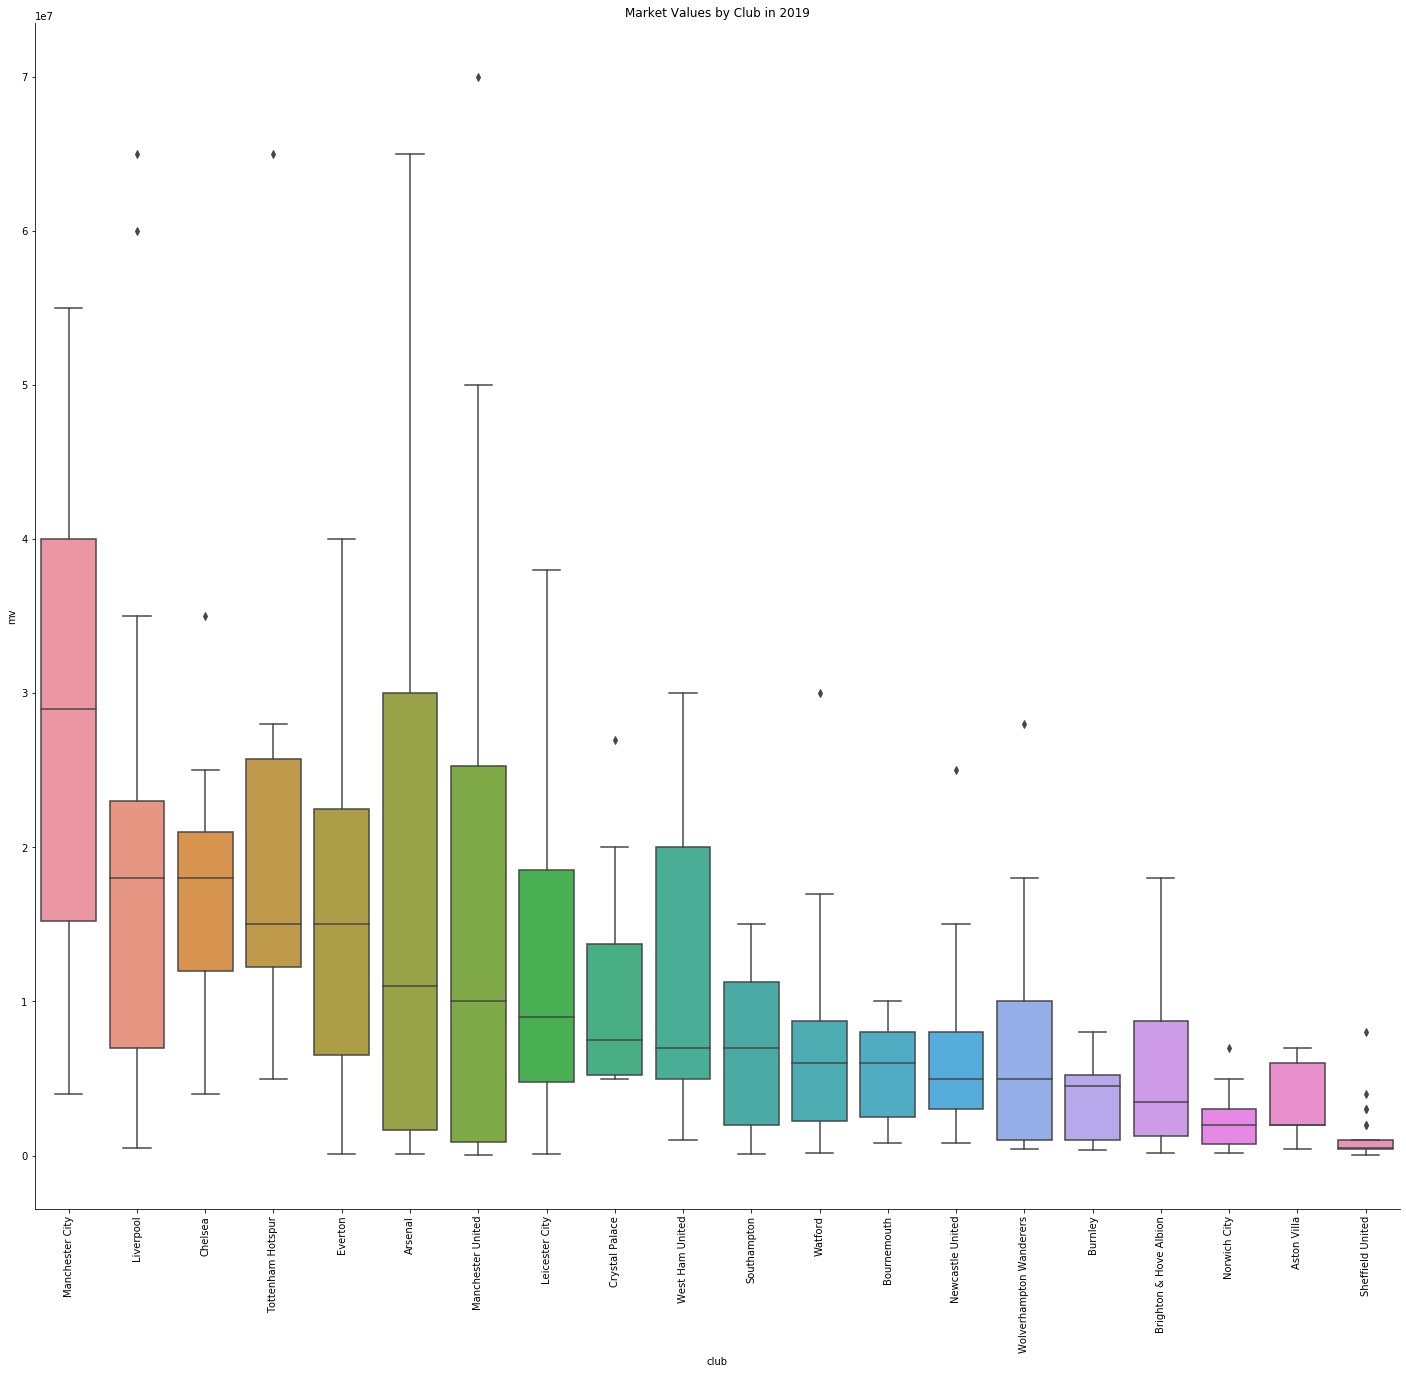

In [8]:
#Historical trends from 
ax=sns.catplot(x="club", y="mv", kind="box", order = order_mv_20, data=df_20)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('Market Values by Club in 2019')
plt.show()